<a href="https://colab.research.google.com/github/bhopchi/VGG16_and_Xception_Models_for_Breast_Cancer_Classification/blob/main/VGG16_and_Xception_Models_for_Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import zipfile

# Specify the path to the zipped dataset file
zip_file_path = '/content/archive (7).zip'

# Specify the path to extract the dataset to
extract_path = '/content/breast cancer'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the zip file to the extract path
    zip_ref.extractall(extract_path)

# The path of the extracted dataset
extracted_dataset_path = extract_path

print(f"Dataset extracted to: {extracted_dataset_path}")

Dataset extracted to: /content/breast cancer


In [ ]:
import os
base_path = '/content/breast cancer/Dataset_BUSI_with_GT'
categories = ['benign', 'malignant', 'normal']

data = []

for category in categories:
    category_path = os.path.join(base_path, category)

    for filename in os.listdir(category_path):
        if filename.endswith('.png') and '_mask' not in filename:  # Exclude mask images
            file_path = os.path.join(category_path, filename)
            data.append({'image_path': file_path, 'label': category})

df = pd.DataFrame(data)

In [ ]:
df.head()

,image_path,label
0,/content/breast cancer/Dataset_BUSI_with_GT/be...,benign
1,/content/breast cancer/Dataset_BUSI_with_GT/be...,benign
2,/content/breast cancer/Dataset_BUSI_with_GT/be...,benign
3,/content/breast cancer/Dataset_BUSI_with_GT/be...,benign
4,/content/breast cancer/Dataset_BUSI_with_GT/be...,benign


In [ ]:
df.tail()

,image_path,label
775,/content/breast cancer/Dataset_BUSI_with_GT/no...,normal
776,/content/breast cancer/Dataset_BUSI_with_GT/no...,normal
777,/content/breast cancer/Dataset_BUSI_with_GT/no...,normal
778,/content/breast cancer/Dataset_BUSI_with_GT/no...,normal
779,/content/breast cancer/Dataset_BUSI_with_GT/no...,normal


In [ ]:
df.shape

(780, 2)

In [ ]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  780 non-null    object
 1   label       780 non-null    object
dtypes: object(2)
memory usage: 12.3+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-10-bce79a466800>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='label', palette='viridis')


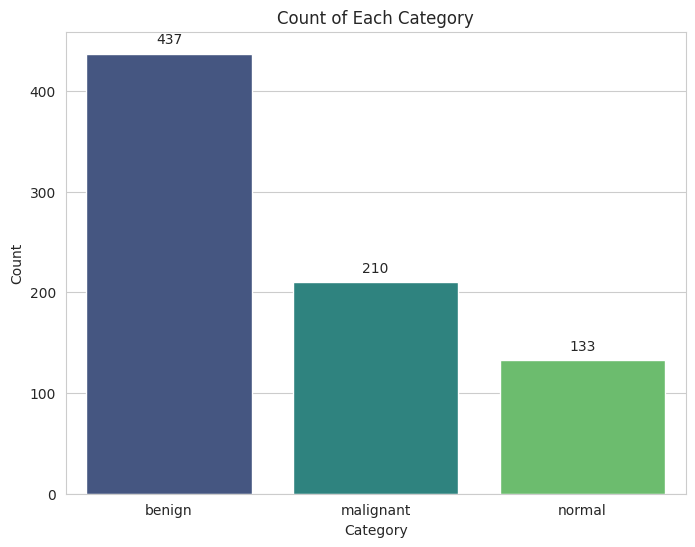

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

ax = sns.countplot(data=df, x='label', palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title("Count of Each Category")
plt.xlabel("Category")
plt.ylabel("Count")

plt.show()

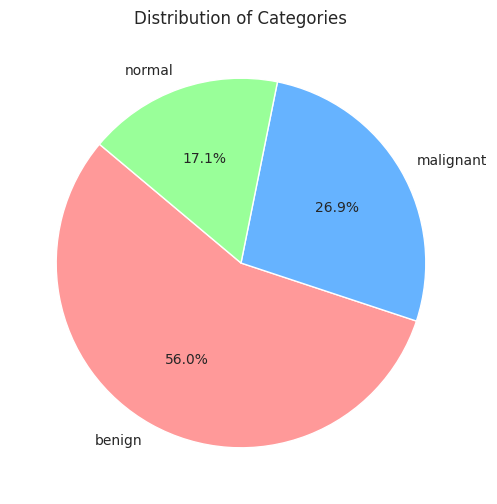

In [ ]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])

plt.title("Distribution of Categories")

plt.show()

In [ ]:
import cv2

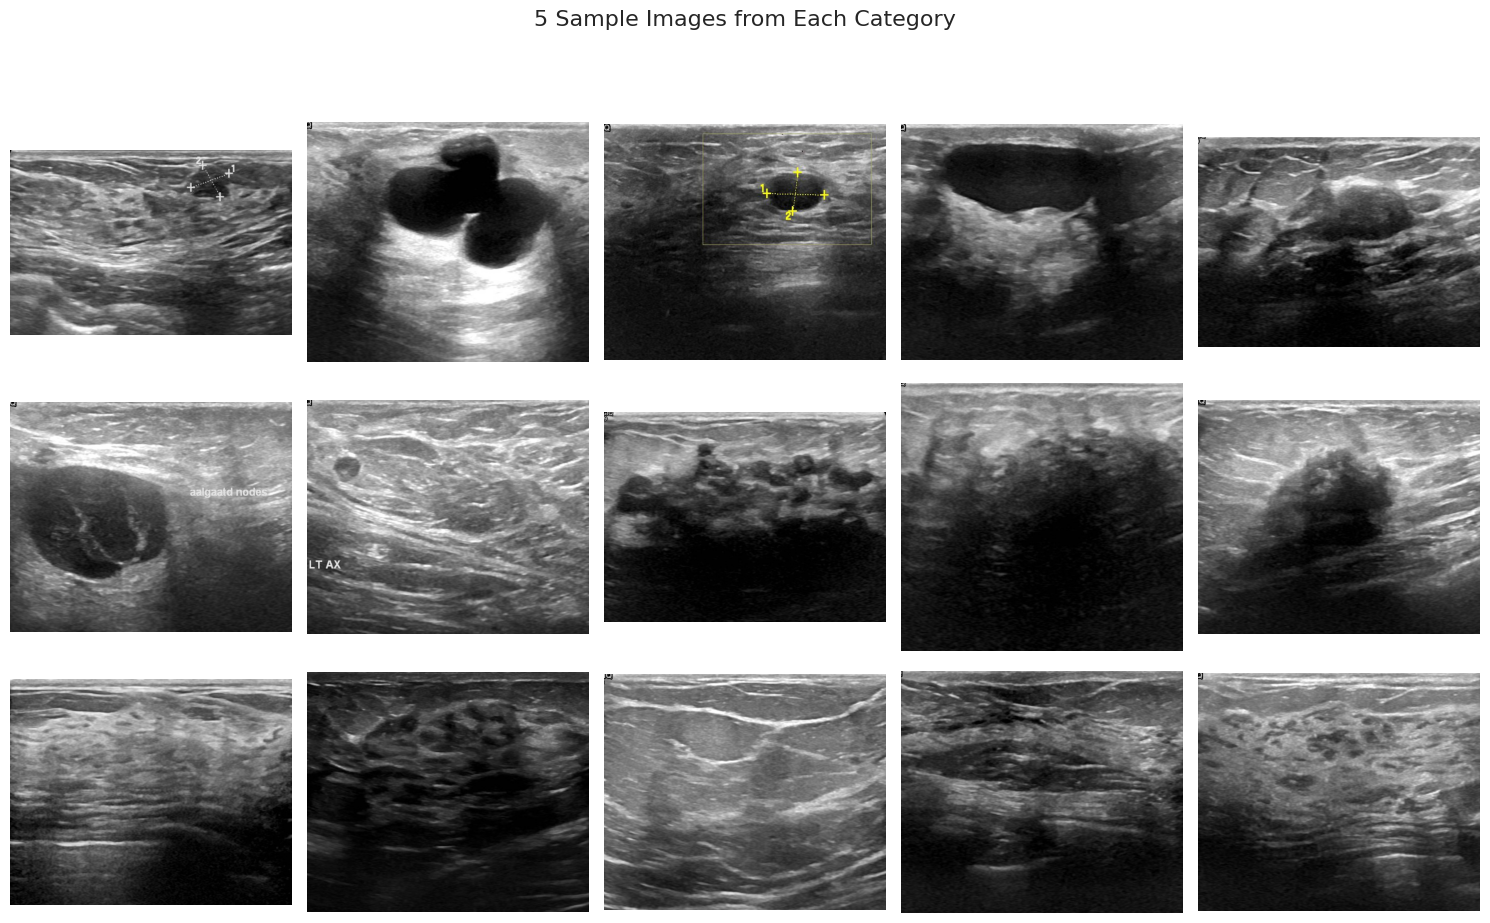

In [ ]:
num_images = 5

fig, axes = plt.subplots(len(categories), num_images, figsize=(15, 10))
fig.suptitle("5 Sample Images from Each Category", fontsize=16)

for i, category in enumerate(categories):

    sample_images = df[df['label'] == category].sample(num_images, random_state=42)

    for j, image_path in enumerate(sample_images['image_path']):

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_ylabel(category, fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [ ]:
df = df[['image_path', 'category_encoded']]

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [ ]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [ ]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    437
1    437
2    437
Name: count, dtype: int64


In [ ]:
df_resampled

,image_path,category_encoded
0,/content/breast cancer/Dataset_BUSI_with_GT/be...,0
1,/content/breast cancer/Dataset_BUSI_with_GT/be...,0
2,/content/breast cancer/Dataset_BUSI_with_GT/be...,0
3,/content/breast cancer/Dataset_BUSI_with_GT/be...,0
4,/content/breast cancer/Dataset_BUSI_with_GT/be...,0
...,...,...
1306,/content/breast cancer/Dataset_BUSI_with_GT/no...,2
1307,/content/breast cancer/Dataset_BUSI_with_GT/no...,2
1308,/content/breast cancer/Dataset_BUSI_with_GT/no...,2
1309,/content/breast cancer/Dataset_BUSI_with_GT/no...,2


In [ ]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [ ]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [ ]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 1048 validated image filenames belonging to 3 classes.
Found 131 validated image filenames belonging to 3 classes.
Found 132 validated image filenames belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention
from tensorflow.keras.optimizers import Adam

def create_vgg16_modified_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = VGG16(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers[:-4]:
        layer.trainable = False

    x = base_model.output

    attention_output = MultiHeadAttention(num_heads=8, key_dim=x.shape[-1])(x, x)
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.3)(x)

    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)

    outputs = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_modified_model = create_vgg16_modified_model(input_shape)

cnn_modified_model.compile(optimizer=Adam(learning_rate=0.0001),
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
history = cnn_modified_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 47s 396ms/step - accuracy: 0.5094 - loss: 1.1016 - val_accuracy: 0.3282 - val_loss: 5.1947
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 52s 181ms/step - accuracy: 0.7960 - loss: 0.5456 - val_accuracy: 0.5725 - val_loss: 1.2601
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - accuracy: 0.8819 - loss: 0.3314 - val_accuracy: 0.8702 - val_loss: 0.4092
Epoch 4/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 180ms/step - accuracy: 0.9108 - loss: 0.2765 - val_accuracy: 0.9237 - val_loss: 0.2665
Epoch 5/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step - accuracy: 0.9513 - loss: 0.1817 - val_accuracy: 0.8473 - val_loss: 0.3985


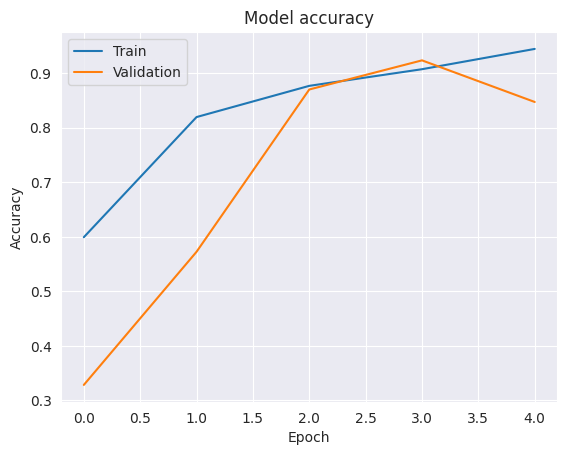

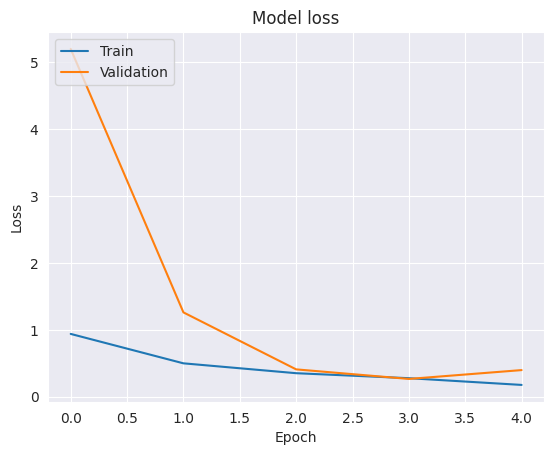

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes
predictions = cnn_modified_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 582ms/step


In [ ]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        44
           1       0.91      0.95      0.93        44
           2       0.94      1.00      0.97        44

    accuracy                           0.95       132
   macro avg       0.95      0.95      0.95       132
weighted avg       0.95      0.95      0.95       132



In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

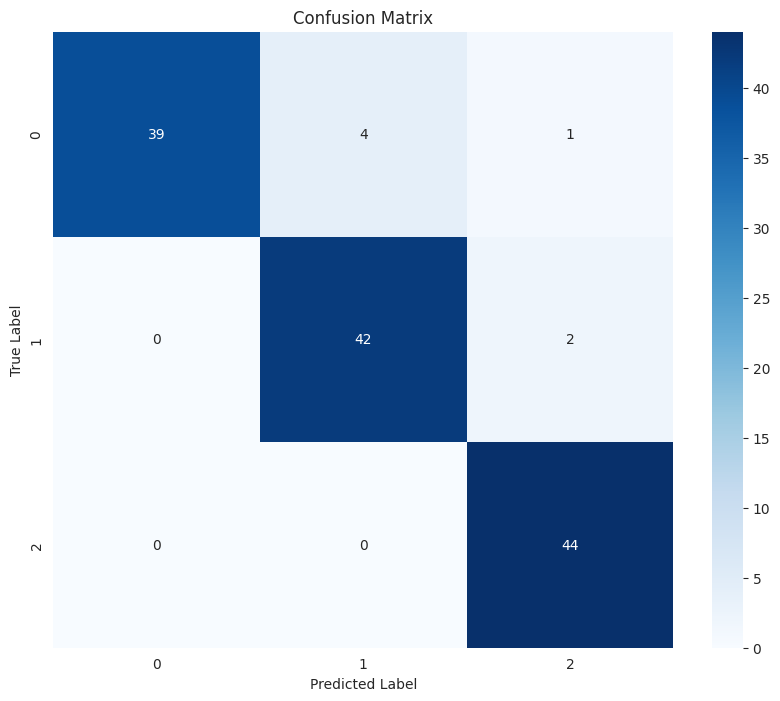

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention
from tensorflow.keras.optimizers import Adam

def create_xception_modified_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers[:-4]:
        layer.trainable = False

    x = base_model.output

    attention_output = MultiHeadAttention(num_heads=8, key_dim=x.shape[-1])(x, x)
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.3)(x)

    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)

    outputs = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_modified_model_xception = create_xception_modified_model(input_shape)

cnn_modified_model_xception.compile(optimizer=Adam(learning_rate=0.0001),
                                    loss='sparse_categorical_crossentropy',
                                    metrics=['accuracy'])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


# Train the Xception Model

In [ ]:
history = cnn_modified_model_xception.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 69s 650ms/step - accuracy: 0.6063 - loss: 1.0096 - val_accuracy: 0.6794 - val_loss: 0.7012
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 322ms/step - accuracy: 0.7919 - loss: 0.5409 - val_accuracy: 0.8168 - val_loss: 0.4537
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 344ms/step - accuracy: 0.8967 - loss: 0.3187 - val_accuracy: 0.9008 - val_loss: 0.2797
Epoch 4/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 326ms/step - accuracy: 0.9516 - loss: 0.1697 - val_accuracy: 0.8931 - val_loss: 0.3517
Epoch 5/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 339ms/step - accuracy: 0.9523 - loss: 0.1341 - val_accuracy: 0.9313 - val_loss: 0.2028


# Train the ResNet50 Model

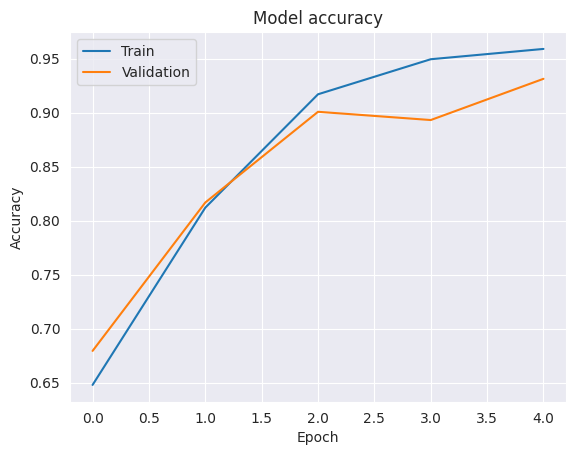

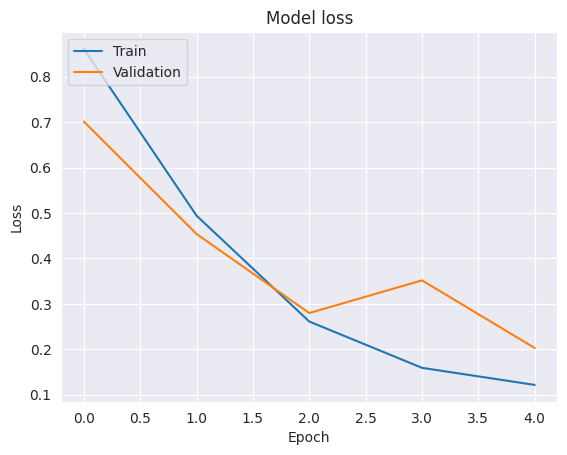

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes
predictions = cnn_modified_model_xception.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 746ms/step


In [ ]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        44
           1       0.88      0.98      0.92        44
           2       0.90      1.00      0.95        44

    accuracy                           0.92       132
   macro avg       0.93      0.92      0.91       132
weighted avg       0.93      0.92      0.91       132



In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

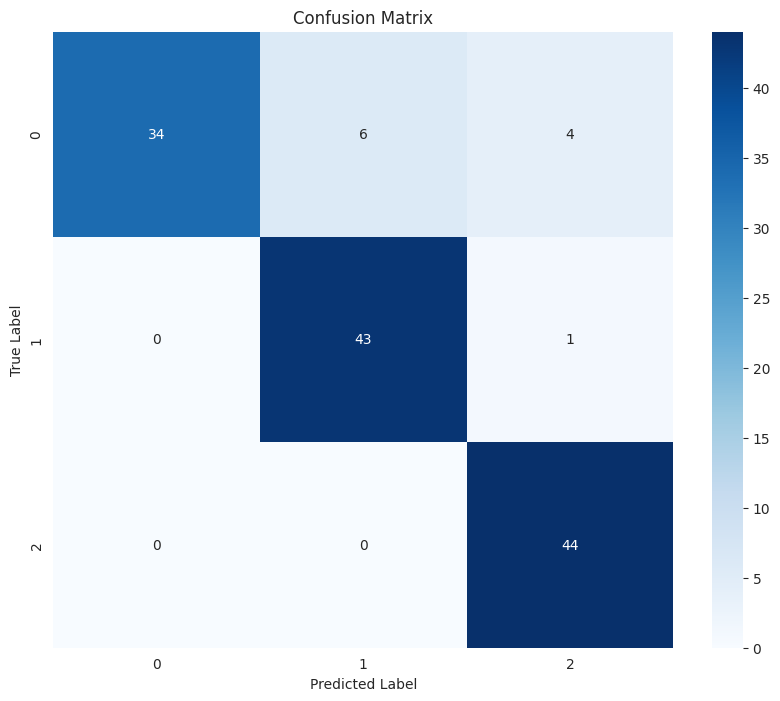

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate and Compare Precision, Recall, and F1-Score

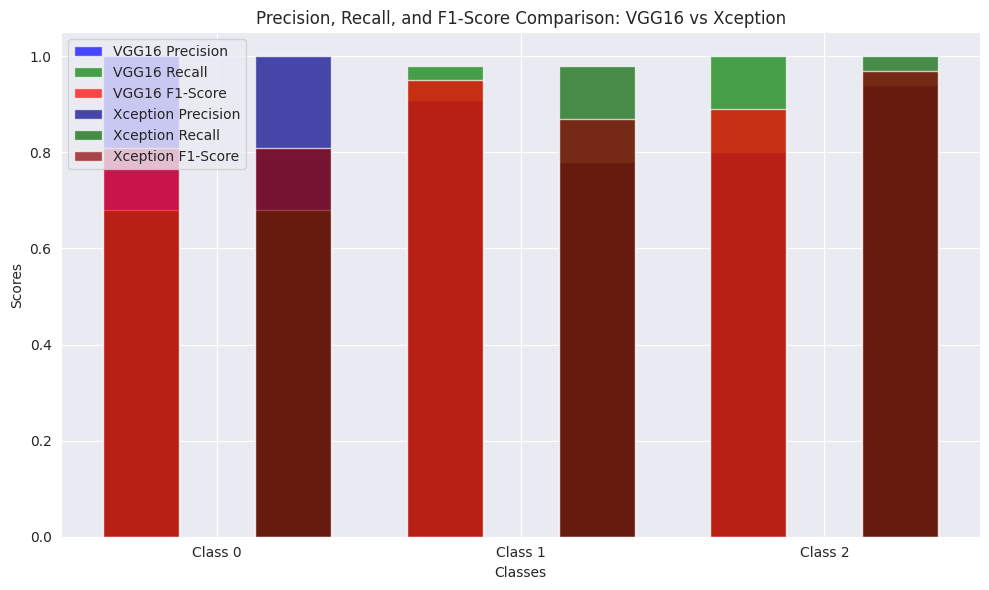

In [ ]:
classes = ['Class 0', 'Class 1', 'Class 2']
vgg16_precision = [1.00, 0.91, 0.80]
vgg16_recall = [0.68, 0.98, 1.00]
vgg16_f1_score = [0.81, 0.95, 0.89]

xception_precision = [1.00, 0.78, 0.94]
xception_recall = [0.68, 0.98, 1.00]
xception_f1_score = [0.81, 0.87, 0.97]

x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width, vgg16_precision, width, label='VGG16 Precision', color='blue', alpha=0.7)
ax.bar(x - width, vgg16_recall, width, label='VGG16 Recall', color='green', alpha=0.7)
ax.bar(x - width, vgg16_f1_score, width, label='VGG16 F1-Score', color='red', alpha=0.7)

ax.bar(x + width, xception_precision, width, label='Xception Precision', color='darkblue', alpha=0.7)
ax.bar(x + width, xception_recall, width, label='Xception Recall', color='darkgreen', alpha=0.7)
ax.bar(x + width, xception_f1_score, width, label='Xception F1-Score', color='darkred', alpha=0.7)

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score Comparison: VGG16 vs Xception')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.tight_layout()
plt.show()

#  Build a Hybrid Model
**A hybrid model combines strengths of VGG16 and ResNet50, improving feature extraction, accuracy, robustness, and generalization in predictions.**

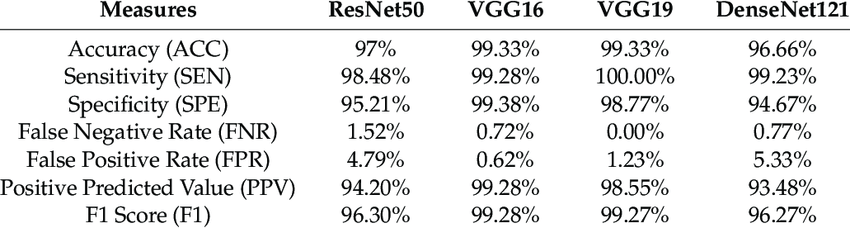

In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50, Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Concatenate, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Create and compile VGG16 model
def create_vgg16_model(input_shape=(224, 224, 3), num_classes=2):
    vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    x = vgg16_base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    vgg16_model = Model(inputs=vgg16_base.input, outputs=predictions)
    vgg16_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return vgg16_model

vgg16_model = create_vgg16_model()

# Create and compile Xception model
def create_xception_model(input_shape=(224, 224, 3), num_classes=2):
    xception_base = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
    x = xception_base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    xception_model = Model(inputs=xception_base.input, outputs=predictions)
    xception_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return xception_model

xception_model = create_xception_model()

# Create and compile hybrid model (VGG16 + ResNet50)
def create_hybrid_model(input_shape=(224, 224, 3), num_classes=2):
    # VGG16 Model
    vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    vgg16_features = vgg16_base.output
    vgg16_features = GlobalAveragePooling2D()(vgg16_features)

    # ResNet50 Model
    resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape) # This line was incorrectly indented
    resnet50_features = resnet50_base.output
    resnet50_features = GlobalAveragePooling2D()(resnet50_features)

    # Concatenate features from both models
    combined_features = Concatenate()([vgg16_features, resnet50_features])

    # Add dense layers for classification
    x = Dense(1024, activation='relu')(combined_features)
    x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Create the hybrid model
    hybrid_model = Model(inputs=[vgg16_base.input, resnet50_base.input], outputs=predictions)
from tensorflow.keras.applications import VGG16, ResNet50, Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Concatenate, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Create and compile VGG16 model
def create_vgg16_model(input_shape=(224, 224, 3), num_classes=2):
    vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    x = vgg16_base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    vgg16_model = Model(inputs=vgg16_base.input, outputs=predictions)
    vgg16_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return vgg16_model

vgg16_model = create_vgg16_model()

# Create and compile Xception model
def create_xception_model(input_shape=(224, 224, 3), num_classes=2):
    xception_base = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
    x = xception_base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    xception_model = Model(inputs=xception_base.input, outputs=predictions)
    xception_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return xception_model

xception_model = create_xception_model()

# Create and compile hybrid model (VGG16 + ResNet50)
def create_hybrid_model(input_shape=(224, 224, 3), num_classes=2):
    # VGG16 Model
    vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    vgg16_features = vgg16_base.output
    vgg16_features = GlobalAveragePooling2D()(vgg16_features)

    # ResNet50 Model
    resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape) # This line was incorrectly indented
    resnet50_features = resnet50_base.output
    resnet50_features = GlobalAveragePooling2D()(resnet50_features)

    # Concatenate features from both models
    combined_features = Concatenate()([vgg16_features, resnet50_features])

    # Add dense layers for classification
    x = Dense(1024, activation='relu')(combined_features)
    x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Create the hybrid model
    hybrid_model = Model(inputs=[vgg16_base.input, resnet50_base.input], outputs=predictions)

    # Compile the model
    hybrid_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return hybrid_model

# Train the Hybrid Model

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet50
import tensorflow as tf

# Training data for the hybrid model
train_data_vgg16 = train_data.map(lambda x, y: (preprocess_input_vgg16(x), y)) # Using imported preprocess_input_vgg16
train_data_resnet50 = train_data.map(lambda x, y: (preprocess_input_resnet50(x), y)) # Using imported preprocess_input_resnet50

# Zip the datasets together, including the labels from the original train_data
train_data_combined = tf.data.Dataset.zip((train_data_vgg16, train_data_resnet50, train_data.map(lambda x, y: y)))
# We map train_data to extract the labels ('y') and create a dataset of labels.
# This dataset is then zipped together with train_data_vgg16 and train_data_resnet50.


# Validation data for the hybrid model
val_data_vgg16 = val_data.map(lambda x, y: (preprocess_input_vgg16(x), y)) # Using imported preprocess_input_vgg16
val_data_resnet50 = val_data.map(lambda x, y: (preprocess_input_resnet50(x), y)) # Using imported preprocess_input_resnet50

# Zip the datasets together, including the labels from the original val_data
val_data_combined = tf.data.Dataset.zip((val_data_vgg16, val_data_resnet50, val_data.map(lambda x, y: y)))
# We map val_data to extract the labels ('y') and create a dataset of labels.
# This dataset is then zipped together with val_data_vgg16 and val_data_resnet50.

NameError: name 'train_data' is not defined

# Evaluate and Compare Precision, Recall, and F1-Score with Other Models


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from tensorflow.keras.applications.xception import preprocess_input as preprocess_input_xception
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet50

# Preprocess validation data for VGG16 and Xception
# Apply preprocessing and batching
val_data_vgg16_preprocessed = val_data.map(lambda x, y: (preprocess_input_vgg16(x), y)).batch(1)
val_data_xception_preprocessed = val_data.map(lambda x, y: (preprocess_input_xception(x), y)).batch(1)

# Preprocess validation data for ResNet50 and add batch dimension
val_data_resnet50_preprocessed = val_data.map(lambda x, y: (preprocess_input_resnet50(x), y)).batch(1)

# Convert the dataset to a NumPy array before prediction
# Collect all the images from the dataset
images_resnet50 = []
for image, _ in val_data_resnet50_preprocessed.as_numpy_iterator():
    images_resnet50.append(image)

# Convert the list of images to a NumPy array
images_resnet50 = np.concatenate(images_resnet50, axis=0)

# Now, you can predict with the NumPy array:
y_pred_resnet50 = np.argmax(resnet50_model.predict(images_resnet50), axis=1)


# ***CHANGE***: Collect images and labels separately for Xception like you did for VGG16
images_xception = []
labels_xception = []
for image, label in val_data_xception_preprocessed.as_numpy_iterator():
    images_xception.append(image)
    labels_xception.append(label)

images_xception = np.concatenate(images_xception, axis=0)
# Now predict on the NumPy array
y_pred_xception = np.argmax(xception_model.predict(images_xception), axis=1)


y_pred_resnet50 = np.argmax(resnet50_model.predict(val_data_resnet50), axis=1)
y_pred_hybrid = np.argmax(hybrid_model.predict((val_data_vgg16, val_data_resnet50)), axis=1)


# True labels
y_true = np.concatenate([y for x, y in val_data], axis=0)
y_true = np.argmax(y_true, axis=1)  # assuming one-hot encoding

# Calculate metrics for VGG16
precision_vgg16 = precision_score(y_true, y_pred_vgg16, average='weighted')
recall_vgg16 = recall_score(y_true, y_pred_vgg16, average='weighted')
f1_vgg16 = f1_score(y_true, y_pred_vgg16, average='weighted')


# Calculate metrics for Xception
precision_xception = precision_score(y_true, y_pred_xception, average='weighted')
recall_xception = recall_score(y_true, y_pred_xception, average='weighted')
f1_xception = f1_score(y_true, y_pred_xception, average='weighted')

# Calculate metrics for ResNet50
precision_resnet50 = precision_score(y_true, y_pred_resnet50, average='weighted')
recall_resnet50 = recall_score(y_true, y_pred_resnet50, average='weighted')
f1_resnet50 = f1_score(y_true, y_pred_resnet50, average='weighted')

# Calculate metrics for Hybrid Model
precision_hybrid = precision_score(y_true, y_pred_hybrid, average='weighted')
recall_hybrid = recall_score(y_true, y_pred_hybrid, average='weighted')
f1_hybrid = f1_score(y_true, y_pred_hybrid, average='weighted')

# Print comparison
print("Precision, Recall, F1-Score Comparison:")
print(f"VGG16 - Precision: {precision_vgg16}, Recall: {recall_vgg16}, F1-Score: {f1_vgg16}")
print(f"Xception - Precision: {precision_xception}, Recall: {recall_xception}, F1-Score: {f1_xception}")
print(f"ResNet50 - Precision: {precision_resnet50}, Recall: {recall_resnet50}, F1-Score: {f1_resnet50}")
print(f"Hybrid Model (VGG16 + ResNet50) - Precision: {precision_hybrid}, Recall: {recall_hybrid}, F1-Score: {f1_hybrid}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import precision_score, recall_score, f1_score

# Load VGG16 and ResNet50 models without the top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base models
vgg_base.trainable = False
resnet_base.trainable = False

# Create the hybrid model
vgg_output = vgg_base.output
resnet_output = resnet_base.output

# Combine the outputs
combined = tf.keras.layers.Concatenate()([Flatten()(vgg_output), Flatten()(resnet_output)])

# Add a fully connected layer
x = Dense(256, activation='relu')(combined)
x = Dense(128, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)  # num_classes should be defined based on your dataset

# Create the final model
model = Model(inputs=[vgg_base.input, resnet_base.input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=10, batch_size=32)

# Evaluate the model
y_pred = model.predict(test_data)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true_classes = tf.argmax(test_labels, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')